# EDA Animes Crunchyroll

I've created this notebook for two main reasons:

1. Because this dataset is cool and i want to share my insights with you, feel free to give me ideas in the comments;
2. Because I always spend hours reading documentation to plot the same plots I've ploted over years and for some reason I just can't remember the syntax.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

## Read dataset

In [2]:
df_animes = pd.read_csv('anime_dataset.csv')
df_animes.head()

,anime,anime_url,anime_img,episodes,votes,weight,rate,rate_1,rate_2,rate_3,...,genre_romance,genre_sci-fi,genre_seinen,genre_sgdrama,genre_shojo,genre_shonen,genre_slice of life,genre_sports,genre_supernatural,genre_thriller
0,Naruto Shippuuden,https://www.crunchyroll.com/naruto-shippuden,https://img1.ak.crunchyroll.com/i/spire4/1c1df...,500,48518,233346,4.81,1111,275,817,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Shugo Chara,https://www.crunchyroll.com/shugo-chara,https://img1.ak.crunchyroll.com/i/spire1/7c0c0...,51,33688,163641,4.86,503,104,438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BLEACH,https://www.crunchyroll.com/bleach,https://img1.ak.crunchyroll.com/i/spire2/52edb...,366,23900,115445,4.83,391,98,370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Naruto,https://www.crunchyroll.com/naruto,https://img1.ak.crunchyroll.com/i/spire2/01453...,220,16613,79667,4.80,456,64,282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Skip Beat!,https://www.crunchyroll.com/skip-beat,https://img1.ak.crunchyroll.com/i/spire3/4bbe3...,0,15011,73683,4.91,98,20,112,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# EDA

## Create features

I'm only interested in animes with at least one vote, so I'll filter them here. Besides that, I want to create a few columns to help me in my analysis.

In [3]:
df_animes = df_animes[df_animes['votes'] > 0].copy()

# Get cols starting with genre_
genre_cols = [col for col in df_animes.columns if col.startswith('genre_')]

# Create columns
df_animes['votes_log'] = np.log10(df_animes['votes'])
df_animes['rate_rounded'] = round(df_animes['rate'])
df_animes['episodes_log'] = np.log10(df_animes['episodes'])
df_animes['qnt_genres'] = df_animes[genre_cols].sum(axis=1)
df_animes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235 entries, 0 to 1234
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   anime                   1235 non-null   object 
 1   anime_url               1235 non-null   object 
 2   anime_img               1235 non-null   object 
 3   episodes                1235 non-null   int64  
 4   votes                   1235 non-null   int64  
 5   weight                  1235 non-null   int64  
 6   rate                    1235 non-null   float64
 7   rate_1                  1235 non-null   int64  
 8   rate_2                  1235 non-null   int64  
 9   rate_3                  1235 non-null   int64  
 10  rate_4                  1235 non-null   int64  
 11  rate_5                  1235 non-null   int64  
 12  genre_action            1235 non-null   float64
 13  genre_adventure         1235 non-null   float64
 14  genre_comedy            1235 non-null   

## Kernel Density Estimation

We have four plots here:

1. Ratings seem high in my opinion, the majority of my animes are close to five rates;
2. Although seem like we don't have many voters, Crunchyroll probably should incentive people of voting more often;
3. Most animes seems to have between 20 and 40 episodes;
4. Most animes seems to have between 2 and 4 genres.

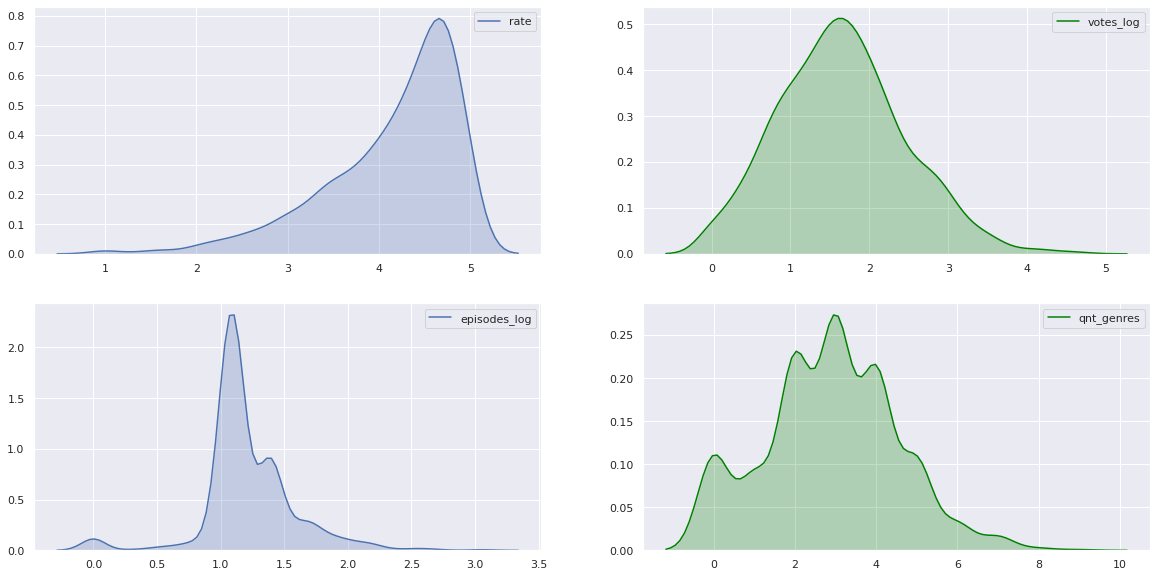

In [4]:
fig, axs  = plt.subplots(2, 2, figsize=(20, 10))

sns.kdeplot(df_animes['rate'], shade=True, ax=axs[0][0])
sns.kdeplot(df_animes['votes_log'], shade=True, color='green', ax=axs[0][1])
sns.kdeplot(df_animes[df_animes['episodes'] > 0]['episodes_log'], shade=True, ax=axs[1][0])
sns.kdeplot(df_animes['qnt_genres'], shade=True, color='green', ax=axs[1][1])

plt.show()

## Ratings

### Scatterplot

This plot tells us a lot! Since the ratings are an integer from zero to five, people don't vote between those values and we can see those vertical lines representing that. Also, the rounded shape pattern is caused because with fewer votes, more close to those intervals (1, 1.5, 2, 2.5 ...)

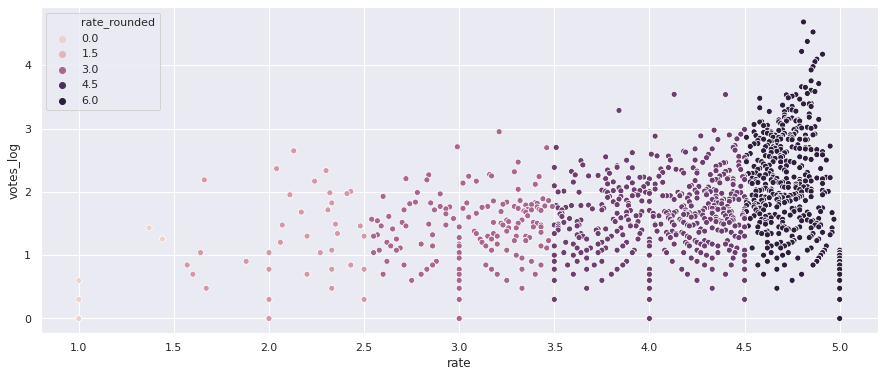

In [5]:
fig, ax = plt.subplots(figsize=(15, 6))

ax = sns.scatterplot(x="rate", y="votes_log", hue='rate_rounded', data=df_animes)

plt.show()

## Joint distributions

This is plot shows us the same but with a different perspective, here we can see more clearly where is our interval denser

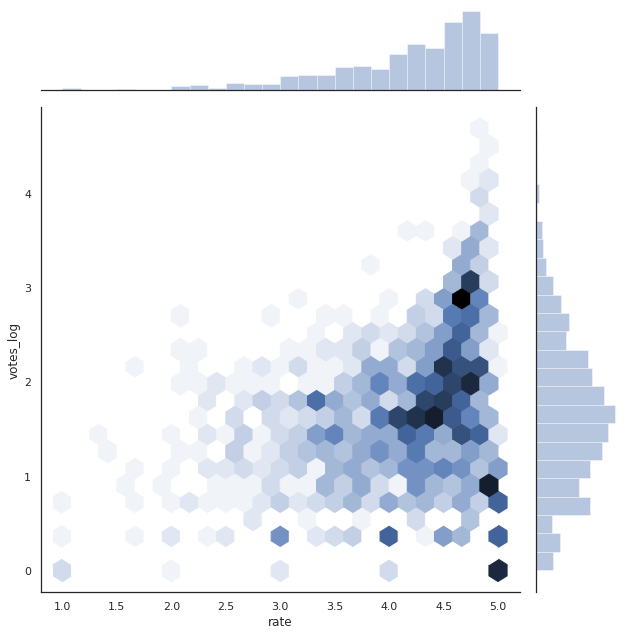

In [6]:
with sns.axes_style('white'):
    ax = sns.jointplot(x="rate", y="votes_log", data=df_animes, kind='hex', height=9)

## Genres

In [7]:
len(genre_cols)

29

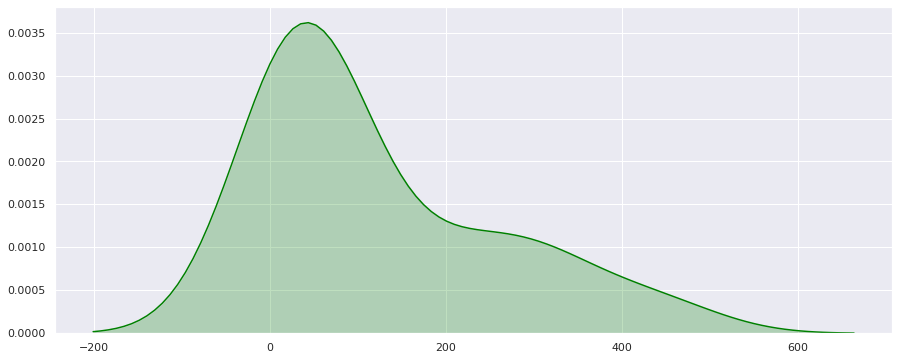

In [8]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.kdeplot(df_animes[genre_cols].sum(), shade=True, color='green', ax=ax)

plt.show()

### Top 10 genres

In [9]:
top10_genres = df_animes[genre_cols].sum().sort_values(ascending=False).head(10)
top10_genres

genre_comedy           462.0
genre_action           408.0
genre_slice of life    324.0
genre_drama            324.0
genre_fantasy          295.0
genre_romance          269.0
genre_sci-fi           215.0
genre_adventure        213.0
genre_supernatural     196.0
genre_shonen           116.0
dtype: float64

#### Rates per genre - top 10 genres

Looks like people doesn't have a clear preference of genre

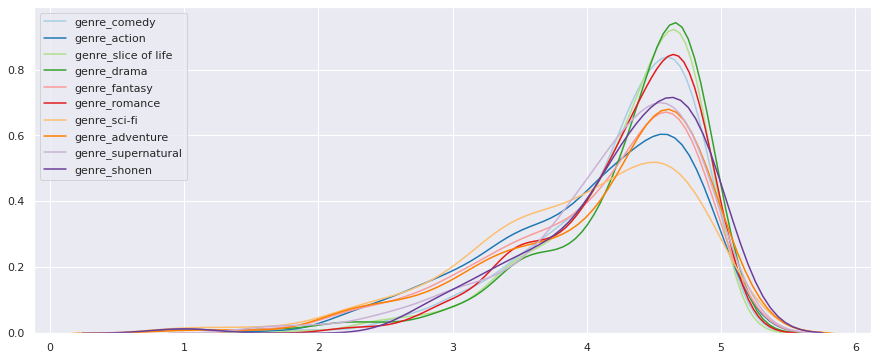

In [10]:
sns.set_palette(sns.color_palette("Paired"))

fig, ax = plt.subplots(figsize=(15, 6))

for col in top10_genres.index:
    sns.kdeplot(df_animes[df_animes[col] == 1]['rate'], label=col, ax=ax)

plt.show()

#### Votes per genre - top 10 genres

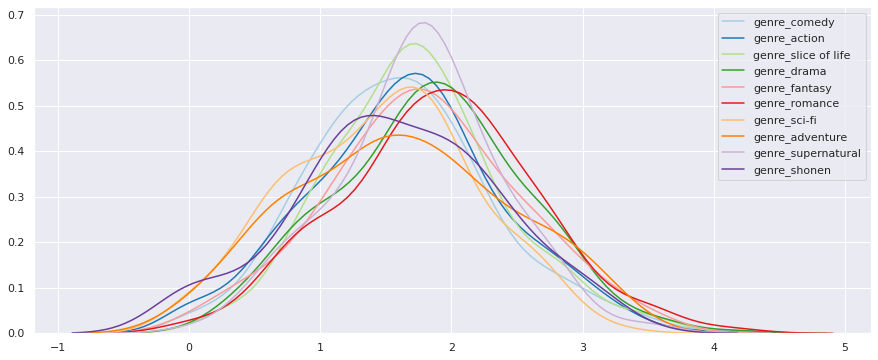

In [11]:
sns.set_palette(sns.color_palette("Paired"))

fig, ax = plt.subplots(figsize=(15, 6))

for col in top10_genres.index:
    sns.kdeplot(df_animes[df_animes[col] == 1]['votes_log'], label=col, ax=ax)

plt.show()

## Top 5 animes

### Number of votes

Looks like our data is missing the number of episodes for some animes, we should take care of it in our crawler

In [12]:
df_animes.sort_values('votes', ascending=False)[['anime', 'episodes', 'votes', 'rate']].head()

,anime,episodes,votes,rate
0,Naruto Shippuuden,500,48518,4.81
1,Shugo Chara,51,33688,4.86
2,BLEACH,366,23900,4.83
3,Naruto,220,16613,4.80
4,Skip Beat!,0,15011,4.91


### Rating

I'll add a thrshold here to avoid animes with only one vote appear with 5 rating and force to have at least 2 episodes

In [13]:
df_animes[(df_animes['votes'] >= df_animes['votes'].median()) & (df_animes['episodes'] > 2)]\
    .sort_values('rate', ascending=False)[['anime', 'episodes', 'votes', 'rate']].head()

,anime,episodes,votes,rate
122,HAIKYU!!,75,530,4.95
270,Run with the Wind,23,168,4.95
179,Fullmetal Alchemist: Brotherhood,64,319,4.93
317,Silver Spoon,22,136,4.91
151,THE PROMISED NEVERLAND,12,433,4.91


### Number of episodes

In [14]:
df_animes.sort_values('episodes', ascending=False)[['anime', 'episodes', 'votes', 'rate']].head()

,anime,episodes,votes,rate
57,One Piece,1135,1142,4.70
0,Naruto Shippuuden,500,48518,4.81
6,Gintama,379,11435,4.87
2,BLEACH,366,23900,4.83
394,Folktales from Japan,300,94,4.77
